<img src='./NWS-small.jpg' height='200px' alt="National Weather Service">  

# National Weather Service Standard Color Curves
*Compiled by [Brian Blaylock](http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/home.html)  
May 8, 2018  
brian.blaylock@utah.edu
*

---

This notebook shows how I made the National Weather Service's (NWS) standard color curves for Python. The NWS wants to standardized these colors throughout the industry. I will use these color curves moving forward, and I hope other people who want to use the NWS color curves in their own Python=generated figures find this notebook useful.

These color maps came from Joe Moore who said:

> While these colors are not "official" just yet, they've gone through years of development and refinement using cartographic best practices balanced with internal feedback and customer needs. They're not perfect, but we think they do a good job of visualized various weather elements across the areas our agency covers. You can see these colors used by most NWS offices on our websites and social media.

These color maps can be imported from [pyBKB_v2/BB_cmap.NWS_standard_cmap.py](https://github.com/blaylockbk/pyBKB_v2/blob/master/BB_cmap/NWS_standard_cmap.py)

Hopefully by using these color scales, your maps will be consistent with colors used in NWS products.

---

Below is a summary of the proposed codes that I gleaned from a PowerPoint presnetation published in April 2018 that I came across.

> **Mission:** Design standard color curves for use with public and NWS partners to improve communication consistency across the agency.

> **Process:** Color curves were developed and iterated using best practices and internal feedback, including over a thousand responses from field office employees.

---

When using these color scales in plots such as `pcolormesh` or `contourf` plots, you need to pay special attention to the vmax and vmin value. The color scales are defined by English units (MPH, F, inches, etc.), so I have inclued the appropriate ranges for metric units. **Use the appropriate vmax and vmin values to scale the colors to the appropriate bounds.** I will demonstrate the color scales with [archived HRRR data](http://hrrr.chpc.utah.edu/).

---

*Let's get started...*

Import some required modules

In [1]:
%matplotlib inline

# Two modules required for making custom colormaps
import numpy as np
import matplotlib.colors as colors

# My custom functions that retrieve HRRR data and draws the HRRR CONUS basemap
import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v2')
from BB_downloads.HRRR_S3 import get_hrrr_variable
from BB_basemap.draw_maps import draw_CONUS_HRRR_map

# Other modules needed for plotting the examples
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,8]

Draw basemap object for CONUS HRRR domain with imported function

In [2]:
# Create a mpa object for the HRRR model domain
m = draw_CONUS_HRRR_map()

---
# Temperature
Colors intuitivly indicate which is colder and which is warmer, paying special consideration for smaller regional maps where temperature may not change too dramatically.

*Range of values:*
- Celsius: -50 through 50 C
- Fahrenheit: -60 through 120 F

In [3]:
# The range of temperature bins in Fahrenheit
a = np.arange(-60,121,5)

# Bins normalized between 0 and 1
norm = [(float(i)-min(a))/(max(a)-min(a)) for i in a]

# Color tuple for every bin
C = np.array([[145,0,63],
              [206,18,86],
              [231,41,138],
              [223,101,176],
              [255,115,223],
              [255,190,232],
              [255,255,255],
              [218,218,235],
              [188,189,220],
              [158,154,200],
              [117,107,177],
              [84,39,143],
              [13,0,125],
              [13,61,156],
              [0,102,194],
              [41,158,255], 
              [74,199,255], 
              [115,215,255], 
              [173,255,255],
              [48,207,194], 
              [0,153,150], 
              [18,87,87],
              [6,109,44],
              [49,163,84],
              [116,196,118],
              [161,217,155],
              [211,255,190],  
              [255,255,179], 
              [255,237,160], 
              [254,209,118], 
              [254,174,42], 
              [253,141,60], 
              [252,78,42], 
              [227,26,28], 
              [177,0,38], 
              [128,0,38], 
              [89,0,66], 
              [40,0,40]])/255.

# Create a tuple for every color indicating the normalized position on the colormap and the assigned color.
COLORS = []
for i, n in enumerate(norm):
    COLORS.append((n, C[i]))

cmap = colors.LinearSegmentedColormap.from_list("Temperature", COLORS)

##### 2 m Temperature

In [4]:
fxx = 0
H = get_hrrr_variable(datetime(2018, 1, 1), 'TMP:2 m', fxx=fxx, verbose=False)

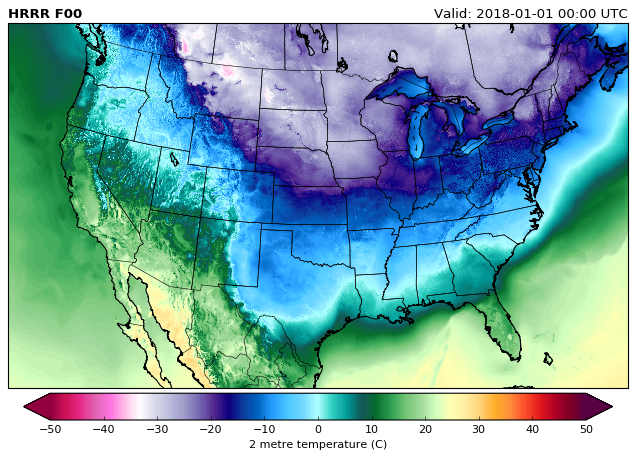

In [5]:
m.drawcoastlines(); m.drawcountries(); m.drawstates()
m.pcolormesh(H['lon'], H['lat'], H['value']-273.15,  #Convert from Kelvin to Celsius
             cmap=cmap,
             vmax=50, vmin=-50,                      #Use the approriate vmax and vmin values
             latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.95, extend='both')
cb.set_label('%s (%s)' % (H['name'], 'C'))

plt.title('HRRR F%02d' % fxx, loc='left', fontweight='semibold')
plt.title('Valid: %s' % H['valid'].strftime('%Y-%m-%d %H:%M UTC'), loc='right')

In [6]:
fxx = 0
H = get_hrrr_variable(datetime(2017, 7, 30, 18), 'TMP:2 m', fxx=fxx, verbose=False)

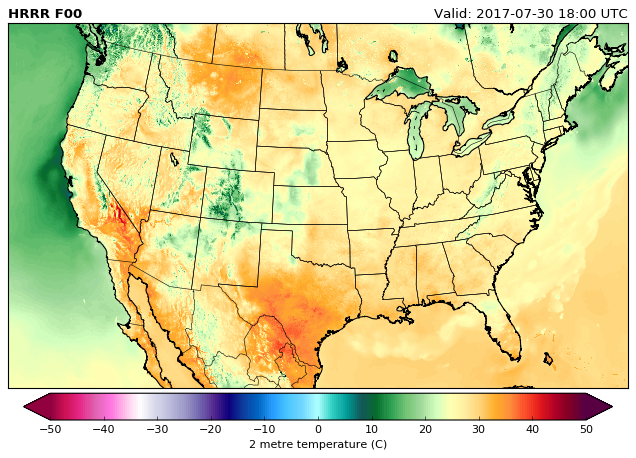

In [7]:
m.drawcoastlines(); m.drawcountries(); m.drawstates()
m.pcolormesh(H['lon'], H['lat'], H['value']-273.15,  #Convert from Kelvin to Celsius
             cmap=cmap,
             vmax=50, vmin=-50,                      #Use the correct vmax and vmin values
             latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.95, extend='both')
cb.set_label('%s (%s)' % (H['name'], 'C'))

plt.title('HRRR F%02d' % fxx, loc='left', fontweight='semibold')
plt.title('Valid: %s' % H['valid'].strftime('%Y-%m-%d %H:%M UTC'), loc='right')

##### 700 mb Temperature

In [8]:
fxx = 0
H = get_hrrr_variable(datetime(2018, 5, 1), 'TMP:700 mb', fxx=fxx, verbose=False)

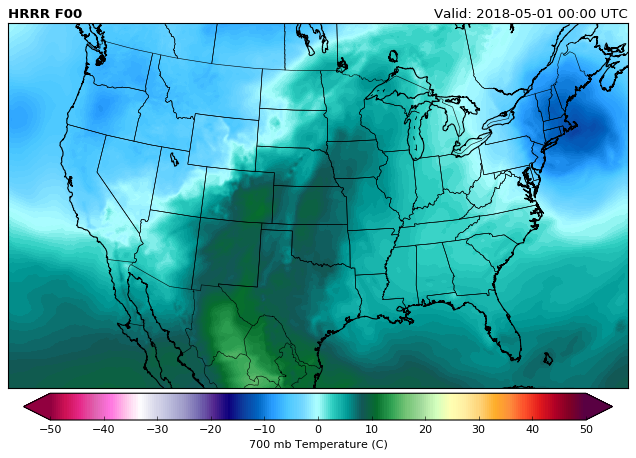

In [9]:
m.drawcoastlines(); m.drawcountries(); m.drawstates()
m.pcolormesh(H['lon'], H['lat'], H['value']-273.15,
             cmap=cmap,
             vmax=50, vmin=-50,
             latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.95, extend='both')
cb.set_label('700 mb %s (%s)' % (H['name'], 'C'))

plt.title('HRRR F%02d' % fxx, loc='left', fontweight='semibold')
plt.title('Valid: %s' % H['valid'].strftime('%Y-%m-%d %H:%M UTC'), loc='right')

---
# Dew Point
Very similar to using the built-in `BrBG` color map. Focused on mid to high end dew point vlues since that's usually when the values matter.

*Range of values**
- Celsius: -18 to 27 C
- Fahrenheit: 0 to 80 F

In [10]:
# The dew point temperature bins in Celsius (C)
a = np.array([0,10,20,30,40,45,50,55,60,65,70,75,80])

# Normalize the bin between 0 and 1 (uneven bins are important here)
norm = [(float(i)-min(a))/(max(a)-min(a)) for i in a]

# Color tuple for every bin
C = np.array([[59,34,4],
              [84,48,5],
              [140,82,10],
              [191,129,45],
              [204,168,84],
              [223,194,125],
              [230,217,181],
              [211,235,231],
              [169,219,211],
              [114,184,173],
              [49,140,133],
              [1,102,95],
              [0,60,48],
              [0,41,33]])

# Create a tuple for every color indicating the normalized position on the colormap and the assigned color.
COLORS = []
for i, n in enumerate(norm):
    COLORS.append((n, np.array(C[i])/255.))

# Create the colormap
cmap = colors.LinearSegmentedColormap.from_list("dewpoint", COLORS)

In [11]:
fxx = 0
H = get_hrrr_variable(datetime(2017, 8, 25, 12), 'DPT:2 m', fxx=fxx, verbose=False)

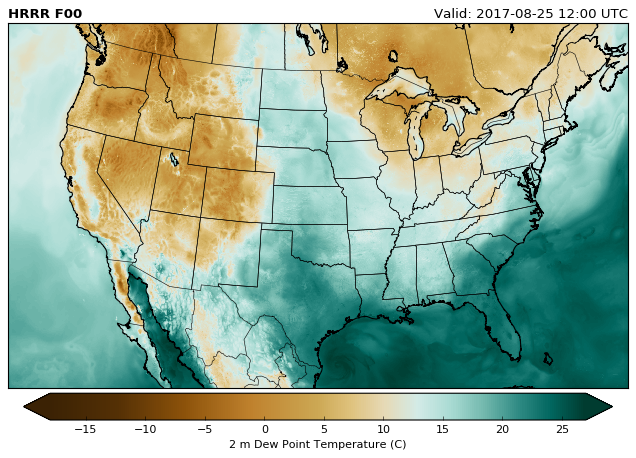

In [12]:
m.drawcoastlines(); m.drawcountries(); m.drawstates()
m.pcolormesh(H['lon'], H['lat'], H['value']-273.15,   #Convert from Kelvin to Celsius
             cmap=cmap,
             vmax=-18, vmin=27,
             latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.95, extend='both')
cb.set_label('2 m Dew Point Temperature (C)')

plt.title('HRRR F%02d' % fxx, loc='left', fontweight='semibold')
plt.title('Valid: %s' % H['valid'].strftime('%Y-%m-%d %H:%M UTC'), loc='right')

---
# Relative Humidity
Very similar to using the built-in `RdYlGn` color map. Focused on low values which have great significance to fire weather forecasting. Used a red/green scale since this was the most common with fire weather users.

*Range of values**
- 5 to 90 %

In [13]:
# The relative humidity bins in percent (%)
a = [5,10,15,20,25,30,35,40,50,60,70,80,90]

# Normalize the bin between 0 and 1 (uneven bins are important here)
norm = [(float(i)-min(a))/(max(a)-min(a)) for i in a]

# Color tuple for every bin
C = np.array([[145,0,34],
              [166,17,34],
              [189,46,36],
              [212,78,51],
              [227,109,66],
              [250,143,67],
              [252,173,88],
              [254,216,132],
              [255,242,170],
              [230,244,157],
              [188,227,120],
              [113,181,92],
              [38,145,75],
              [0,87,46]])

# Create a tuple for every color indicating the normalized position on the colormap and the assigned color.
COLORS = []
for i, n in enumerate(norm):
    COLORS.append((n, np.array(C[i])/255.))

# Create the colormap
cmap = colors.LinearSegmentedColormap.from_list("rh", COLORS)

In [14]:
fxx = fxx
H = get_hrrr_variable(datetime(2017, 8, 25, 12), 'RH:2 m', fxx=fxx, verbose=False)

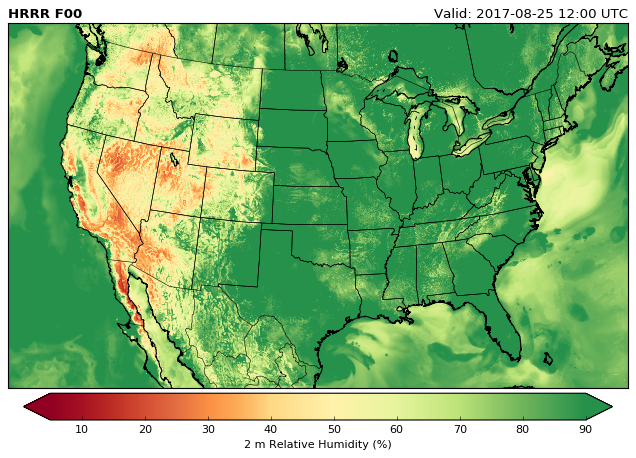

In [15]:
m.drawcoastlines(); m.drawcountries(); m.drawstates()
m.pcolormesh(H['lon'], H['lat'], H['value'],
             cmap=cmap,
             vmax=5, vmin=90,
             latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.95, extend='both')
cb.set_label('2 m Relative Humidity (%)')

plt.title('HRRR F%02d' % fxx, loc='left', fontweight='semibold')
plt.title('Valid: %s' % H['valid'].strftime('%Y-%m-%d %H:%M UTC'), loc='right')

---
# Wind Speed/Gust

Focused on the middle values that would be a majority of values (30-60 MPH). Kept resolution at low end due to fire weather sensitivity to light winds. Large bins at top for tropical storms.

*Range of Values:*
- Metric: 0-60 m/s
- English: 0-140 MPH

In [16]:
# The wind speed bins in miles per hour (MPH)
a = [0,5,10,15,20,25,30,35,40,45,50,60,70,80,100,120,140]

# Normalize the bin between 0 and 1 (uneven bins are important here)
norm = [(float(i)-min(a))/(max(a)-min(a)) for i in a]

# Color tuple for every bin
C = np.array([[16,63,120],
              [34,94,168],
              [29,145,192],
              [65,182,196],
              [127,205,187],
              [180,215,158],
              [223,255,158],
              [255,255,166],
              [255,232,115],
              [255,196,0],
              [255,170,0],
              [255,89,0],
              [255,0,0],
              [168,0,0],
              [110,0,0],
              [255,190,232],
              [255,115,223]])

# Create a tuple for every color indicating the normalized position on the colormap and the assigned color.
COLORS = []
for i, n in enumerate(norm):
    COLORS.append((n, np.array(C[i])/255.))

# Create the colormap
cmap = colors.LinearSegmentedColormap.from_list("wind", COLORS)

##### 10 m Wind Speed

In [ ]:
fxx = 0
H = get_hrrr_variable(datetime(2017, 8, 25, 12), 'UVGRD:10 m', fxx=fxx, verbose=False)

In [ ]:
m.drawcoastlines(); m.drawcountries(); m.drawstates()
m.pcolormesh(H['lon'], H['lat'], H['SPEED'],
             cmap=cmap,
             vmax=0, vmin=60,
             latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.95, extend='max')
cb.set_label(r'10 m Wind Speed (m s$\mathregular{^{-1}}$)')

plt.title('HRRR F%02d' % fxx, loc='left', fontweight='semibold')
plt.title('Valid: %s' % H['valid'].strftime('%Y-%m-%d %H:%M UTC'), loc='right')

##### 500 mb Wind Speed

In [ ]:
fxx = 0
H = get_hrrr_variable(datetime(2017, 8, 25, 12), 'UVGRD:500 mb', fxx=fxx, verbose=False)

In [ ]:
m.drawcoastlines(); m.drawcountries(); m.drawstates()
m.pcolormesh(H['lon'], H['lat'], H['SPEED'],
             cmap=cmap,
             vmax=0, vmin=60,
             latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.95, extend='max')
cb.set_label(r'500 mb Wind Speed (m s$\mathregular{^{-1}}$)')

plt.title('HRRR F%02d' % fxx, loc='left', fontweight='semibold')
plt.title('Valid: %s' % H['valid'].strftime('%Y-%m-%d %H:%M UTC'), loc='right')

---
# Sky Cover / Cloud Cover

Fairly intuitive range of colors, using a dark gray instead of black for the highest values.

*Range of Values:*
- 0 to 90 %

In [ ]:
# The sky covered by clouds in percent (%)
a = range(0,91,10)

# Normalize the bin between 0 and 1 (uneven bins are important here)
norm = [(float(i)-min(a))/(max(a)-min(a)) for i in a]

# Color tuple for every bin
C = np.array([[36, 160, 242],
              [78, 176, 242],
              [128, 183, 248],
              [160, 200, 255],
              [210, 225, 255],
              [225, 225, 225],
              [201, 201, 201],
              [165, 165, 165],
              [110, 110, 110],
              [80, 80, 80]])

# Create a tuple for every color indicating the normalized position on the colormap and the assigned color.
COLORS = []
for i, n in enumerate(norm):
    COLORS.append((n, np.array(C[i])/255.))

# Create the colormap
cmap = colors.LinearSegmentedColormap.from_list("cloudcover", COLORS)

In [ ]:
fxx = 0
H = get_hrrr_variable(datetime(2017, 8, 25, 12), 'TCDC:entire', fxx=fxx, verbose=False)

In [ ]:
m.drawcoastlines(); m.drawcountries(); m.drawstates()
m.pcolormesh(H['lon'], H['lat'], H['value'],
             cmap=cmap,
             vmax=0, vmin=90,
             latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.95, extend='max')
cb.set_label('%s (%s)' % (H['name'], H['units']))

plt.title('HRRR F%02d' % fxx, loc='left', fontweight='semibold')
plt.title('Valid: %s' % H['valid'].strftime('%Y-%m-%d %H:%M UTC'), loc='right')

---
# Amount of Precipitation (QPF/QPE)
Quantitative percipitation forecast/estimation color map. Uses common, recongnizable Green-Yellow-Red progression similar to common radar imagery. Last two bins were added for monthly/annual precipitation maps and in response to Hurricane Harvey.

*Range of Values:*
- Metric: 0 to 762 millimeters
- English: 0 to 30 inches

In [ ]:
# The amount of precipitation in inches
a = [0,.01,.1,.25,.5,1,1.5,2,3,4,6,8,10,15,20,30]

# Normalize the bin between 0 and 1 (uneven bins are important here)
norm = [(float(i)-min(a))/(max(a)-min(a)) for i in a]

# Color tuple for every bin
C = np.array([[255,255,255],
              [199,233,192],
              [161,217,155],
              [116,196,118],
              [49,163,83],
              [0,109,44],
              [255,250,138],
              [255,204,79],
              [254,141,60],
              [252,78,42],
              [214,26,28],
              [173,0,38],
              [112,0,38],
              [59,0,48],
              [76,0,115],
              [255,219,255]])

# Create a tuple for every color indicating the normalized position on the colormap and the assigned color.
COLORS = []
for i, n in enumerate(norm):
    COLORS.append((n, np.array(C[i])/255.))

# Create the colormap
cmap = colors.LinearSegmentedColormap.from_list("precipitation", COLORS)

In [ ]:
fxx = 18
H = get_hrrr_variable(datetime(2017, 8, 25, 12), 'APCP:surface:0', fxx=fxx, verbose=False)

In [ ]:
m.drawcoastlines(); m.drawcountries(); m.drawstates()
m.pcolormesh(H['lon'], H['lat'], H['value'],
             cmap=cmap,
             vmax=0, vmin=762,
             latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.95, extend='max')
cb.set_label('%s (%s)' % (H['name'], H['units']))

plt.title('HRRR F%02d' % fxx, loc='left', fontweight='semibold')
plt.title('Valid: %s' % H['valid'].strftime('%Y-%m-%d %H:%M UTC'), loc='right')